In [1]:
import pandas as pd 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df['target']=iris.target

In [5]:
X=df.iloc[:,:-1]
y=df['target']


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
from sklearn import tree

In [9]:
decision_tree=tree.DecisionTreeClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':[None, 'sqrt', 'log2']
                 
}

In [32]:
cv=GridSearchCV(decision_tree,param_grid=parameter,cv=5,scoring='accuracy')

In [33]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
y_pred=cv.predict(X_test)

In [35]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 1, 2, 0, 0])

In [36]:
cv.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=3, splitter='random')

In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
a_score=accuracy_score(y_pred,y_test)

In [39]:
a_score

0.9333333333333333

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [44]:
best_tree=cv.best_estimator_
best_tree

DecisionTreeClassifier(criterion='log_loss', max_depth=3, splitter='random')

[Text(0.6, 0.875, 'x[3] <= 2.065\nlog_loss = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.4, 0.625, 'x[2] <= 2.236\nlog_loss = 1.541\nsamples = 104\nvalue = [40, 41, 23]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'log_loss = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.375, 'x[3] <= 1.939\nlog_loss = 0.942\nsamples = 64\nvalue = [0, 41, 23]'),
 Text(0.4, 0.125, 'log_loss = 0.901\nsamples = 60\nvalue = [0, 41, 19]'),
 Text(0.8, 0.125, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.8, 0.625, 'log_loss = 0.0\nsamples = 16\nvalue = [0, 0, 16]'),
 Text(0.7, 0.75, '  False')]

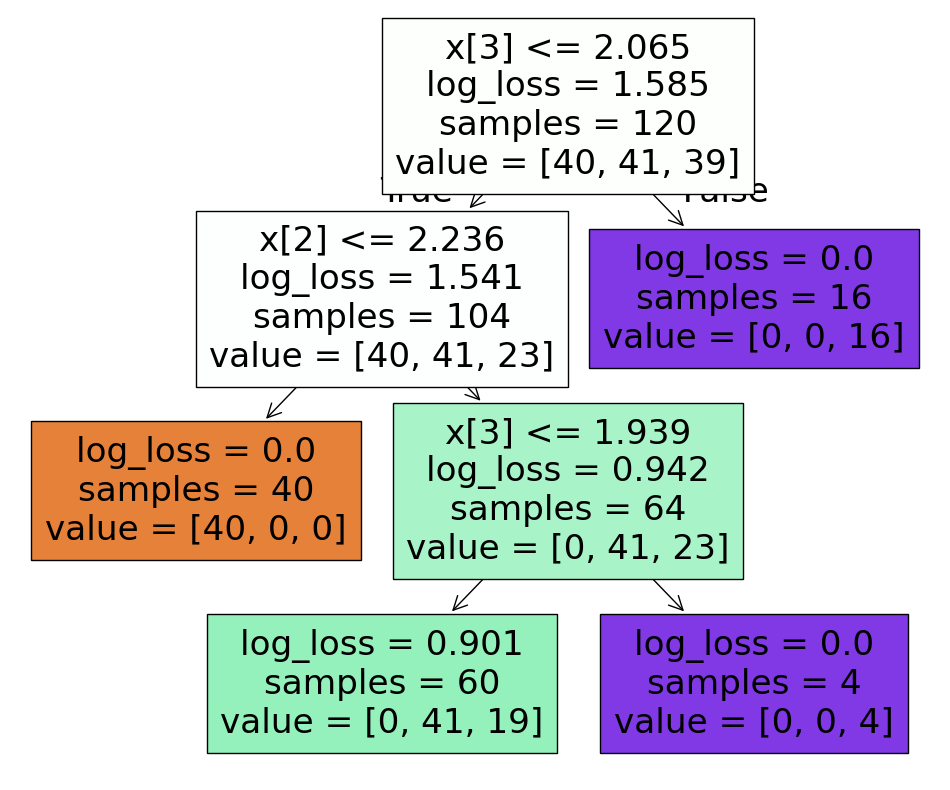

In [45]:
plt.figure(figsize=(12,10))
tree.plot_tree(best_tree,filled=True)